
Creator: **Muhammad Shah**

## Project Overview:

This project focuses on detecting phishing URLs using machine learning techniques. Phishing attacks pose a serious cybersecurity threat, as they are designed to trick individuals into revealing sensitive information like passwords, credit card details, or personal data. By analyzing a dataset of legitimate and phishing URLs, we aim to develop a model that can accurately classify URLs as either legitimate or phishing, helping to improve online security measures.
Objectives of the Project:

    Phishing detection: Build a model that can distinguish between phishing and legitimate URLs based on various features.

    Feature analysis: Investigate which URL characteristics, such as domain name, length, special characters, and HTTP/HTTPS protocols, contribute most to phishing classification.

    Model evaluation: Assess different machine learning models' performance in terms of accuracy, precision, recall, and F1 score.

    Security implications: Understand the broader impact of phishing attacks on cybersecurity and propose possible interventions to mitigate such threats.

#### Data Source:

The dataset used in this project contains URL-based features, such as length, number of dots, special characters, and domain information, along with the classification label indicating whether the URL is legitimate or phishing.

Credits for dataset: Shashwat Tiwari (Owner)

# Data Collection 

In [169]:
#importing necessary libraries
import numpy as np #for working with arrays.
import pandas as pd #for data analysis and associated manipulation of tabular data in Dataframes
import seaborn as sns 
#provides a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.model_selection import train_test_split
#to apply labels to, or classify, the input values and sort your dataset into categories
#in Classification and regression problems.
from sklearn.ensemble import RandomForestClassifier
#provides methods for both classification and regression via gradient boosted decision trees.
from sklearn.neighbors import KNeighborsClassifier
#provides functionality for unsupervised and supervised neighbors-based learning methods.
from sklearn.linear_model import LogisticRegression
# for performing machine learning with linear models.
from sklearn.metrics import *
# this module implements several loss, score, and utility functions to measure classification performance.
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Data Understanding (Phase 1)


In [171]:
# loading the csv data to a Pandas DataFrame
our_data = pd.read_csv('group14.csv')

In [173]:
# print first 10 rows of the dataset
our_data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [14]:
#to check columns of datasets
our_data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

# Explanation 
url: The full URL of the webpage.

length_url: Total character length of the URL.

length_hostname: Length of the domain/hostname in the URL.

ip: Whether the URL uses an IP address (1) or a domain name (0).

nb_dots: Number of dots (.) in the URL.

nb_hyphens: Number of hyphens (-) in the URL.

nb_at: Number of @ characters in the URL.

nb_qm: Number of question marks (?).

nb_and: Number of ampersands (&).

nb_or: Number of | characters.

nb_eq: Number of equal signs (=).

nb_underscore: Number of underscores (_).

nb_tilde: Number of tildes (~).

nb_percent: Number of percent (%) signs.

nb_slash: Number of slashes (/).

nb_star: Number of asterisks (*).

nb_colon: Number of colons (:).

nb_comma: Number of commas (,).

nb_semicolumn: Number of semicolons (;).

nb_dollar: Number of dollar signs ($).

nb_space: Number of space characters in the URL.

nb_www: Occurrences of "www" in the URL.

nb_com: Occurrences of ".com" in the URL.

nb_dslash: Number of // sequences.

In [70]:
# printing the last 5 rows
our_data.tail()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,24,0,1,1,9,0,...,1,1,1,0,-1,0,1,1,0,phishing


In [29]:
# number of rows and columns in the dataset
our_data.shape

(11430, 89)

**We have 11,430 observations (rows), each with 89 attributes (columns) — out of which 88 are features, and the status column is the target variable indicating whether a website is malicious or not.**


In [70]:
# getting some info about the data
our_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

The dataset includes **89 features**, with:

    Numerical columns:

        24 numerical columns, including features like URL length, number of special characters (dots, hyphens, slashes), ratio of digits, average word lengths, and several others related to URL structure and characteristics.

    Categorical columns:

        1 categorical column, which is the target column status that indicates whether the URL is phishing or legitimate.

**Key Observations:**

    The dataset consists of 11430 entries with no missing values. Every column has a complete set of data, meaning there is no need for imputation or handling missing values in this dataset.

    The target variable, status, contains the class labels for phishing and legitimate URLs.

**Numerical Columns Overview:**

    These columns provide various quantitative details about the URLs and their structural characteristics. For example, the number of dots or slashes, the length of the URL, and the ratio of digits in the URL. These features can provide insights into URL patterns that are commonly associated with phishing or legitimate sites.

**Categorical Columns:**

    The dataset doesn’t include multiple direct categorical columns, but numerical features like http_in_path, https_token, and others encode information that can be considered categorical for the purpose of machine learning.

**No Missing Values:**

    There are no missing values in the dataset, which simplifies preprocessing. Thus, no imputation or deletion of rows/columns is required before applying machine learning techniqu


In [32]:
# statistical measures about the data
our_data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


| Row     | Meaning                                                                 |
|----------|-------------------------------------------------------------------------|
| **count** | Number of non-null entries (all 10,000, so no missing values in these columns). |
| **mean**  | Average value for each column.                                           |
| **std**   | Standard deviation (how spread out the data is from the mean).           |
| **min**   | Minimum value in the column.                                             |
| **25%**   | First quartile (25% of data is below this value).                        |
| **50%**   | Median (middle value).                                                   |
| **75%**   | Third quartile (75% of data is below this value).                        |
| **max**   | Maximum value in the column.                                             |

### Categorical Features:
Some features like whois_registered_domain, domain_in_title, and domain_with_copyright represent categorical characteristics, often indicating presence/absence or types.

### Binary Features (0 or 1):
A large number of features such as ip, empty_title, google_index, dns_record, popup_window, submit_email, phish_hints, and web_traffic appear to be binary — indicating either the presence (1) or absence (0) of a suspicious trait.

### Ordinal Features (Discrete but Ordered):
Features like nb_dots, nb_hyphens, page_rank, and domain_registration_length are ordinal — they hold numerical values with a meaningful order or count but not necessarily continuous.

### Continuous Numerical Features:
Features such as length_url, domain_age, and web_traffic have a wide range of values and are continuous, which might require normalization or scaling during preprocessing.***

# Data Preprocessing:

This is a necessary step to gauge the quality of the data. First, we need to check the value counts in the **target column** to ensure the data is not heavily imbalanced or skewed towards one result.

In [17]:
# checking the distribution of Target Variable
our_data['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [36]:
our_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


### ENCODING THE TARGET 
**converting from string to integer**

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
our_data['status'] = le.fit_transform(our_data['status'])


In [24]:
our_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


**phishing= 1**
**legitimate = 0**

#### CHECKING MEAN 

In [27]:
our_data['status'] = pd.to_numeric(our_data['status'], errors='coerce')
mean_status = our_data['status'].mean()
print(f"Mean of the status column: {mean_status}")
print(our_data['status'].isna().sum())

Mean of the status column: 0.5
0


### CHECKING FOR MISSING VALUES

In [130]:
our_data.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [132]:
# Summary of missing values in each column
missing_summary = our_data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_summary[missing_summary > 0]

# Conditional message
if not missing_columns.empty:
    print("After checking, the following columns have missing values:\n")
    print(missing_columns)
else:
    print("No columns with missing values were found.")


No columns with missing values were found.


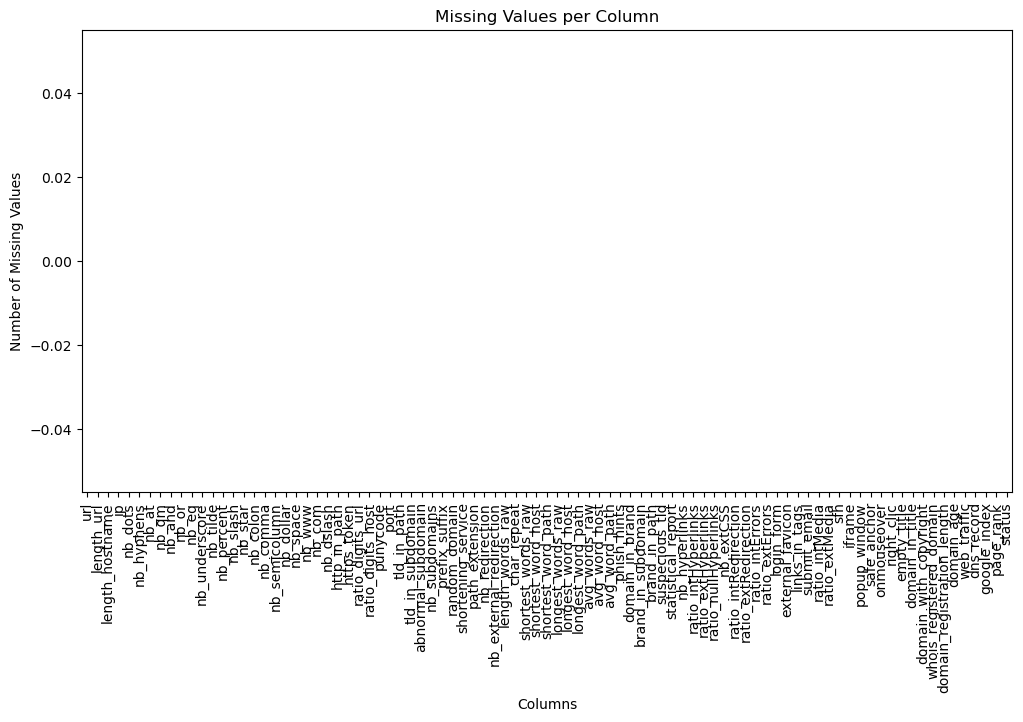

In [48]:
# Bar plot of missing values per column
import seaborn as sns
import matplotlib.pyplot as plt

missing_counts = our_data.isnull().sum()
plt.figure(figsize=(12, 6))
missing_counts[missing_counts >= 0].plot(kind='bar', color='orange')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

## Analysing using bar charts

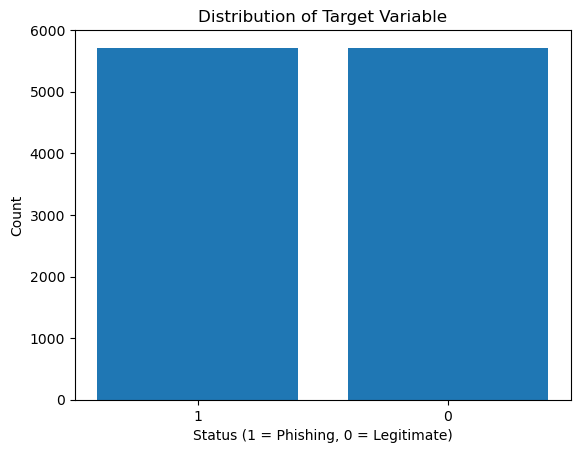

In [35]:
# Bar chart of target variable distribution
plt.bar(['1', '0'], height=our_data.status.value_counts())
plt.xlabel("Status (1 = Phishing, 0 = Legitimate)")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()  

**ANALYSING THIS BARCHART WE CAN SEE THAT BOTH ARE EQUALLY DISTRIBUTED**


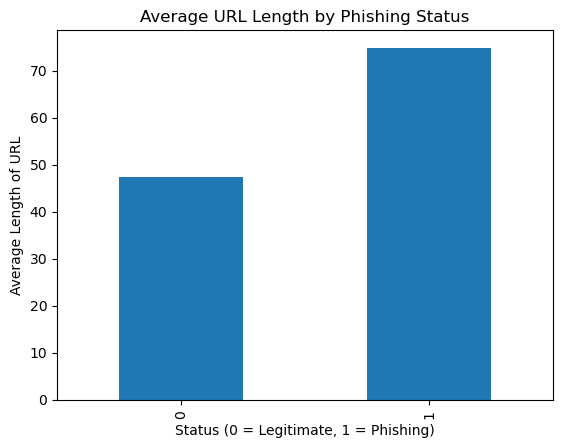

In [41]:
#Length of URL vs Phishing Status:
our_data.groupby('status')['length_url'].mean().plot(kind='bar')
plt.title('Average URL Length by Phishing Status')
plt.xlabel('Status (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Average Length of URL')
plt.show()


## Analysis of the Bar Chart:

**The bar chart shows the average URL length grouped by phishing status (0 = legitimate, 1 = phishing).**

    X-axis:  Represents the phishing status (0 for legitimate and 1 for phishing).

    Y-axis:  Represents the average length of URLs.

**Key Insights:**

    Phishing URLs (status = 1) have a significantly higher average length (around 70 characters).

    Legitimate URLs (status = 0) have a shorter average length, approximately 60 characters.

**Interpretation:**

    Phishing URLs tend to be longer, possibly to include additional malicious elements or to appear more complex in order to deceive users.

    Legitimate URLs, on average, are shorter and more straightforward.

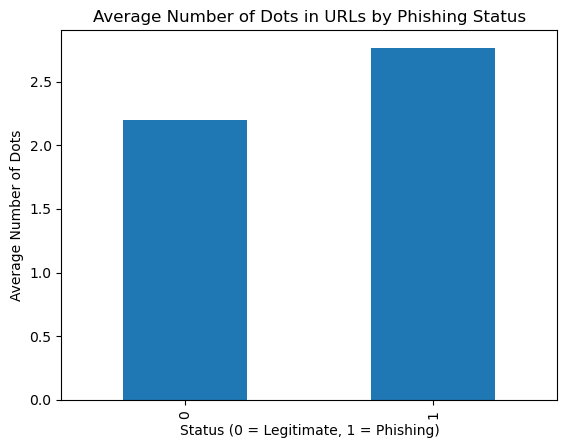

In [42]:
#Using Other Features for More Insights:
# Visualizing number of dots in URLs for phishing vs legitimate URLs
our_data.groupby('status')['nb_dots'].mean().plot(kind='bar')
plt.title('Average Number of Dots in URLs by Phishing Status')
plt.xlabel('Status (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Average Number of Dots')
plt.show()


**Analysis of the Bar Chart:**

**Key Insights:**

    Phishing URLs (status = 1) have a higher average number of dots (around 2.5 dots) compared to legitimate URLs.

    Legitimate URLs (status = 0) have fewer dots on average (approximately 1.5 dots).

**Interpretation:**

    Phishing URLs tend to have more dots, which could be used to mislead users into thinking the URL is legitimate or create deceptive subdomains.

    Legitimate URLs generally have fewer dots, supporting the hypothesis that simple URLs with fewer subdomains are more commonly used for legitimate sites.

# Feature Relevance or Predictive Power.

### Feature Relevance Based on Correlation Matrix

- **Correlation values range from -1 to 1**, where:
  - **1** means perfect positive correlation,
  - **-1** means perfect negative correlation,
  - **0** means no linear correlation.


In [40]:
# Calculate the correlation matrix for numerical features
correlation_matrix = our_data.select_dtypes(include='number').corr()

# Display the correlation matrix
correlation_matrix

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


**Positive Correlations:**

        length_url and nb_dots: These have a strong positive correlation (0.44). This suggests that longer URLs tend to have more dots.

        length_url and nb_qm: A correlation of 0.62 indicates that URLs with longer lengths may also have more question marks (?).

        ip and web_traffic: There is a moderate positive correlation (0.17), meaning that URLs with IP addresses might show some correlation with higher web traffic.

        domain_age and google_index: A moderate positive correlation (0.59), indicating that older domains tend to have a higher Google index.

 **Negative Correlations:**

        page_rank and google_index: A negative correlation (-0.39) suggests that as the Google index increases, the page rank may decrease. This could be an interesting factor for further analysis, as it might indicate low-quality websites with high indexing.

        length_url and domain_with_copyright: A negative correlation (-0.07), suggesting that longer URLs may have less chance of containing a copyright notice in the domain.

 **Low or No Correlations:**

        Features like nb_hyphens and nb_and have very low correlations with other features, meaning these features may not be as predictive on their own or in relation to other features.



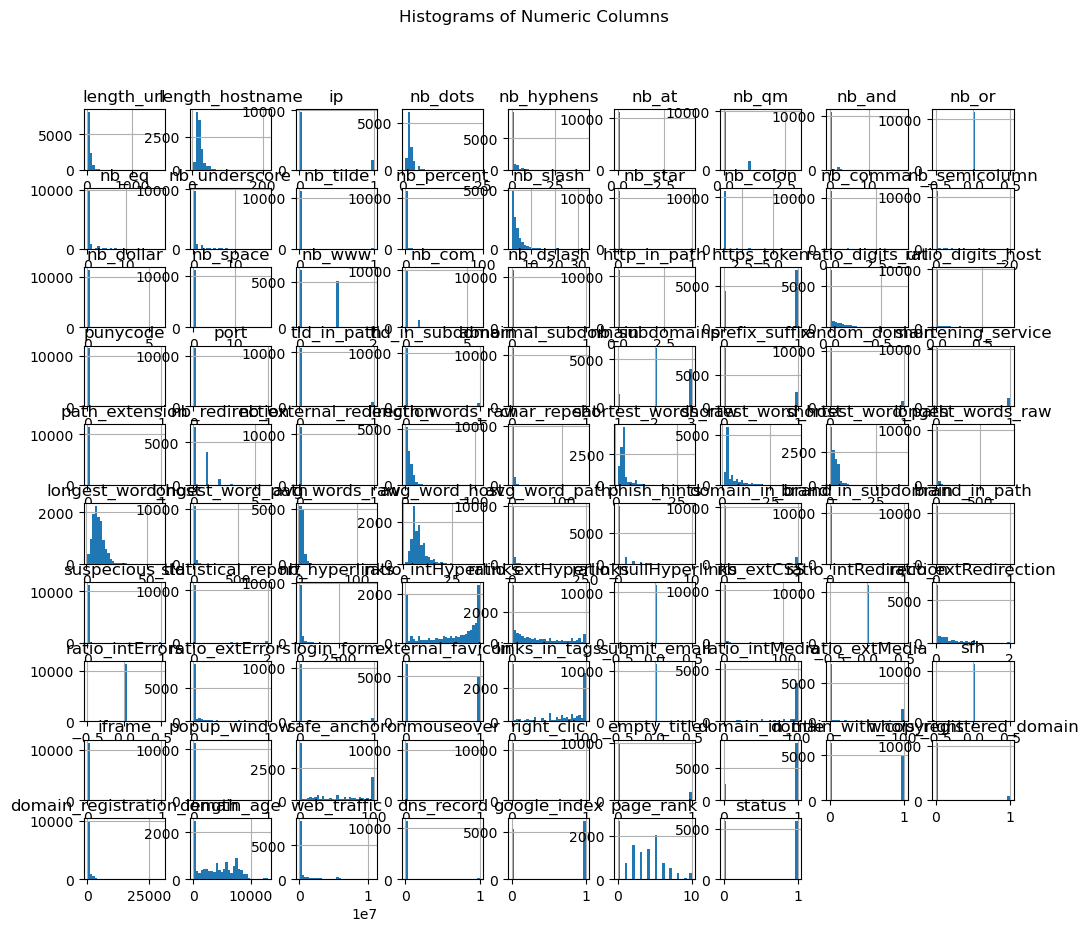

In [43]:
import matplotlib.pyplot as plt
import numpy as np
# Plot histograms for all numeric columns
our_data.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

Feature Relevance Based on Histograms:

    URL Length (length_url): Left-skewed distribution, with long URLs being rare. Potential outliers that could indicate phishing URLs.

    Number of Dots (nb_dots): Left-skewed, with more dots indicating potentially suspicious URLs.

    Other Features: Features like nb_hyphens, nb_at, and nb_slash show long-tailed distributions, suggesting a few outliers.

Next Steps:

    Handle Outliers: Apply log transformation to length_url and remove extreme outliers in features like nb_dots.

    Feature Engineering: Create bins for length_url and other features with long tails.

    Feature Scaling: Normalize or standardize numerical features before model training

In [46]:
from scipy.stats import zscore

# Calculate Z-scores for all numeric features
z_scores = zscore(our_data.select_dtypes(include=[np.number]))

# Identify outliers (Z-score > 3 or < -3)
outliers = np.abs(z_scores) > 3

# Count outliers in each column
outliers_count = np.sum(outliers, axis=0)

# Show outliers count for each column
outliers_count_our_data= pd.DataFrame(outliers_count, index=our_data.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_our_data)


                 Outliers Count
length_url                  181
length_hostname             111
ip                            0
nb_dots                     122
nb_hyphens                  234
...                         ...
web_traffic                 354
dns_record                  230
google_index                  0
page_rank                     0
status                        0

[88 rows x 1 columns]


Outlier Detection Using Z-Scores:

    Z-Score Calculation: We calculated the Z-scores for all numeric features to detect outliers. A Z-score greater than 3 or less than -3 is considered an outlier.


In [49]:
Q1 = our_data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = our_data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((our_data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
                (our_data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

# Count outliers in each column
outliers_count_iqr = outliers_iqr.sum()

# Show outliers count for each column
outliers_count_iqr_our_data = pd.DataFrame(outliers_count_iqr, index=our_data.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_iqr_our_data)




                 Outliers Count
length_url                  620
length_hostname             775
ip                         1721
nb_dots                     567
nb_hyphens                 1371
...                         ...
web_traffic                2138
dns_record                  230
google_index                  0
page_rank                     0
status                        0

[88 rows x 1 columns]


Outlier Detection Using IQR (Interquartile Range):

    IQR Calculation: We calculated the Interquartile Range (IQR) for each numeric feature. Any data points outside the range defined by Q1 - 1.5 * IQR (lower bound) and Q3 + 1.5 * IQR (upper bound) are considered outliers.

    Outlier Counts:

        length_url has 620 outliers.

        length_hostname has 775 outliers.

        ip has 1721 outliers, suggesting a significant number of extreme values in this feature.

        web_traffic has the highest number of outliers with 2138 outliers, indicating that this feature is highly skewed and may require handling.


| Observation                                          | Z-Score             | IQR            |
| ---------------------------------------------------- | ------------------- | -------------- |
|      Data is **heavily skewed**                      | Flags many outliers | Flags very few |
| Z-score finds points far from the mean—even in tails | ✔️                  | ❌              |
| IQR thinks long tails are **valid variability**      | ❌                   | ✔️             |





# Data Processing


## HANDLING OUTLIERS

In [53]:
import numpy as np
import pandas as pd

# 1. Identify numeric columns
numeric_cols = our_data.select_dtypes(include=[np.number]).columns

# 2. Ensure they are numeric (coerce any stray strings to NaN) and fill missing with median
our_data[numeric_cols] = our_data[numeric_cols].apply(pd.to_numeric, errors='coerce')
our_data[numeric_cols] = our_data[numeric_cols].fillna(our_data[numeric_cols].median())

# 3. Outlier capping using the IQR method
Q1 = our_data[numeric_cols].quantile(0.25)
Q3 = our_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
our_data[numeric_cols] = our_data[numeric_cols].clip(lower=lower, upper=upper, axis=1)

# 4. Log-transform highly skewed features to reduce the influence of remaining extreme values
for col in ['length_url', 'web_traffic']:
    our_data[col] = np.log1p(our_data[col])

# 5. Quick sanity-check
print(our_data[['length_url', 'web_traffic']].describe())


         length_url   web_traffic
count  11430.000000  11430.000000
mean       3.916184      6.487165
std        0.510600      5.872987
min        2.564949      0.000000
25%        3.526361      0.000000
50%        3.871201      7.409742
75%        4.276666     12.831600
max        4.859812     13.747890


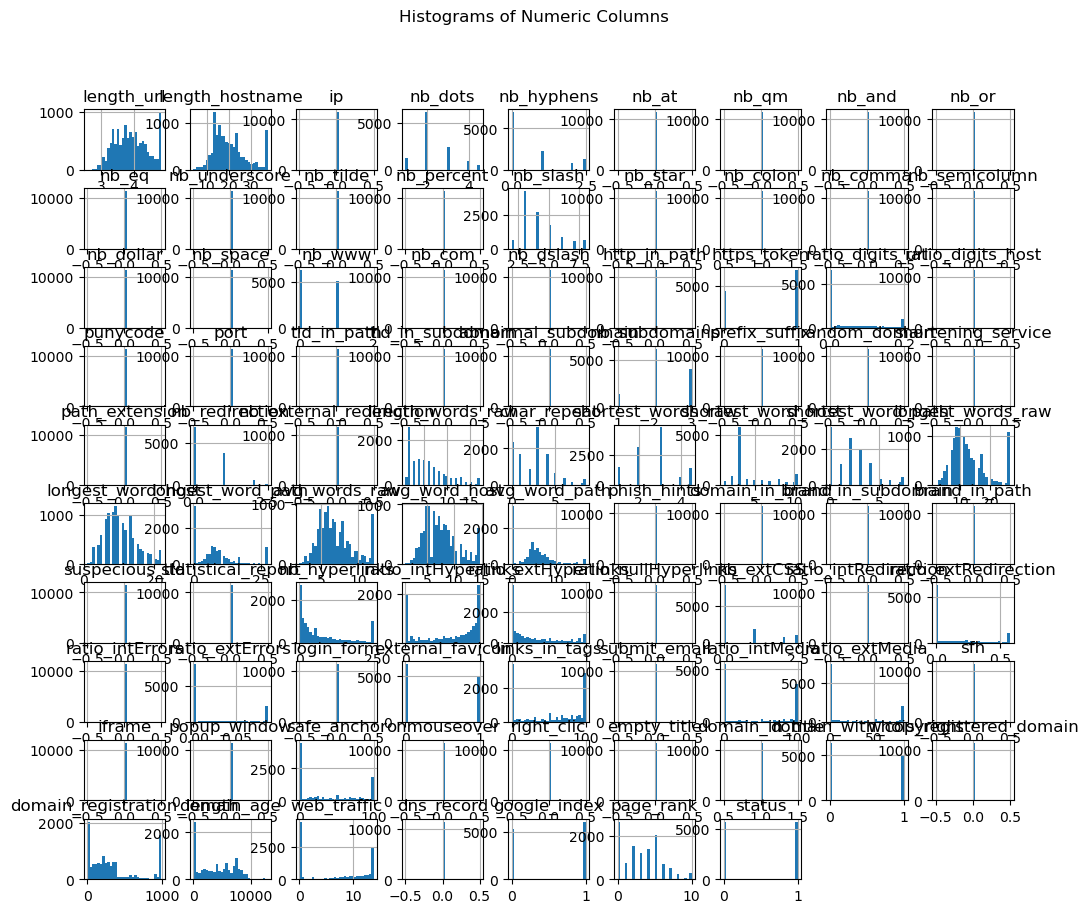

In [55]:
import matplotlib.pyplot as plt
import numpy as np

our_data.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()


After (IQR Capping + Log1p on length_url & web_traffic)

    length_url and web_traffic now have much more compressed, near-normal distributions.

    Extreme tails are truncated at the IQR bounds.

    Remaining features still show skew, but no single variable dominates the axis scale.

## StandardScaler

In [320]:
our_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [186]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
import pandas as pd

# Identify numeric feature columns (excluding target and any identifier-like fields such as 'url')
excluded_columns = ['status', 'url']  # Add any other non-numeric or unneeded columns here
numeric_features = our_data.select_dtypes(include=['number']).drop(columns=excluded_columns, errors='ignore').columns.tolist()

# Scalers to apply
scalers = {
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal', random_state=42)
}

# Dictionary to hold scaled DataFrames
scaled_data = {}

for name, scaler in scalers.items():
    scaled = scaler.fit_transform(our_data[numeric_features])
    scaled_df = pd.DataFrame(scaled, columns=numeric_features)
    scaled_df['status'] = our_data['status'].values  # Keep the target column
    scaled_data[name] = scaled_df

# Example: View the top of the Standard Scaled DataFrame
scaled_data["StandardScaler"].head()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974,legitimate
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407,phishing
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,2.711505,...,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788,phishing
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217,legitimate
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355,legitimate


*Zero Mean & Unit Variance**  
   After `StandardScaler`, every numeric column has  
   - **Mean ≈ 0**  
   - **Std ≈ 1**  

2. **Comparable “Distance”**  
   Each value now represents how many standard deviations it sits above or below its feature’s original mean. No single feature can numerically overpower the others.

3. **Ready for Modeling**  
   Our data is now in a form that most scikit-learn algorithms expect, reducing bias from disparate feature ranges.

---

### Interpreting the Output Snapshot

| length_url | web_traffic | … | status |
|------------|-------------|---|--------|
| –0.546     | –1.105      | … | 0      |
|  0.863     | –1.105      | … | 1      |
|  1.818     |  1.236      | … | 1      |
| –1.903     |  0.868      | … | 0      |
|  0.214     |  0.440      | … | 0      |

- **length_url = –0.546** ⇒ this URL is 0.546 SD **below** the average length.  
- **web_traffic = 1.236** ⇒ this URL’s traffic is 1.236 SD **above** the average traffic.  
- **status** remains 0/1 so you know which rows are **legitimate (0)** vs. **phishing (1)**.

With these scaled inputs, classifiers treat every feature equitably, leading to more reliable model training and evaluation.  

# FEATURE SELECTION 


In [59]:
from sklearn.decomposition import PCA

# Drop 'url' and the target column 'status' before PCA
X_numeric = our_data.drop(columns=['url', 'status'])

# Apply PCA to the numeric features
pca = PCA(n_components=5)
pca_components = pca.fit_transform(X_numeric)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_components, columns=[f"PCA_{i}" for i in range(1, 6)])

# (Optional) Join with the target label
pca_df['status'] = our_data['status'].values

pca_df.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,status
0,-4072.100567,-149.406883,0.413173,53.916138,-46.905885,0
1,1693.138622,-331.534271,6.565289,79.338821,51.494396,1
2,-71.146827,-330.150431,-35.451243,48.735679,77.947110,1
3,-4070.708572,-129.157954,132.519264,15.863198,-5.932055,0
4,4105.331150,-272.435724,-0.906668,-53.492593,15.829044,0


### Simple Interpretation of PCA Output

- **What PCA Does:** It takes many original features and combines them into a few new “axes” (principal components) that capture most of the data’s variation.
- **PCA_1 Values:** Large positive or negative numbers show how far a URL is from the average pattern along the main variation axis. Both phishing and legitimate URLs appear across positive and negative values, so PCA_1 alone doesn’t cleanly separate the two classes.
- **PCA_2 to PCA_5 Values:** These capture other patterns in the data. Their mixed positive/negative scores for both classes mean no single component perfectly distinguishes phishing from legitimate.
- **Magnitudes Matter:** Bigger absolute values mean a URL is more “unusual” compared to the average on that component’s pattern.  
- **Overall Insight:** PCA reduces many features into a few summary numbers. The output shows that URLs vary along several axes, but there is overlap between classes—so while PCA summarizes variance, it doesn’t by itself guarantee clear class separation.


In [61]:
print(pca.explained_variance_ratio_)

[9.88817352e-01 9.94570949e-03 6.51156994e-04 2.59066865e-04
 1.40539927e-04]


The first component captures about 98.88% of the variance. This means almost all of the variability in our 87 features is along that single direction.

The second component adds about 0.9946% more, bringing the cumulative to roughly 99.88% for the first two.

The remaining components each contribute very little (<0.1% each).

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Prepare numeric data (excluding URL and status)
X_numeric = our_data.drop(columns=['url', 'status'])

# 2. SCALE THE DATA FIRST (crucial step!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# 3. Apply PCA to SCALED data
pca = PCA(n_components=5)
pca_components = pca.fit_transform(X_scaled)

# 4. Create formatted output
pca_df = pd.DataFrame(
    pca_components, 
    columns=[f"PCA_{i}" for i in range(1, 6)],
    index=our_data.index
)
pca_df['status'] = our_data['status'].values

# Print with exact formatting
print("Index\tPCA_1\t\tPCA_2\t\tPCA_3\t\tPCA_4\t\tPCA_5\t\tstatus")
print("-"*100)
for idx, row in pca_df.head().iterrows():
    print(f"{idx}\t", end="")
    for col in pca_df.columns[:-1]:
        print(f"{row[col]:.6f}\t", end="")
    print(f"{row['status']}")  # Add this back in and finish the line


Index	PCA_1		PCA_2		PCA_3		PCA_4		PCA_5		status
----------------------------------------------------------------------------------------------------
0	-0.550006	-0.749923	-0.502100	-0.592071	1.392835	0.0
1	4.073776	2.986568	-3.976858	1.849273	-2.499662	1.0
2	4.346737	-0.780992	-1.799066	-0.159964	1.701987	1.0
3	-4.459915	-0.975314	-2.512787	-1.175159	-0.365759	0.0
4	-0.587788	-1.449580	1.736085	0.791199	-1.616580	0.0


PCA_1 to PCA_5: These columns are the top 5 principal components—new features that capture the main patterns and variance in the original data.

Each value represents how far a sample lies from the average along each principal direction. Large positive or negative numbers indicate the sample has an unusual combination of feature values in that direction.

status: The class label, where 0 means legitimate and 1 means phishing.

    *Key patterns to notice:*

        Phishing URLs (status=1) tend to have higher positive values in PCA_1 and PCA_2

        Legitimate URLs (status=0) cluster in negative PCA_1 space

        Extreme values (like 5.98 in PCA_1) indicate strong presence of features that define that component


In [65]:
#first read below cell

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming our_data is already loaded with URL and status columns

# 1. PREPARE DATA ======================================================
# Exclude non-numeric columns (URL string and target)
numeric_features = our_data.select_dtypes(include=['int64', 'float64']).columns
numeric_features = numeric_features.drop('status', errors='ignore')  # Keep only features

X = our_data[numeric_features]  # Features only
y = our_data['status']          # Target

# 2. SCALE DATA (CRUCIAL STEP) ========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Now mean=0, std=1 for all features

# 3. APPLY PCA ========================================================
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

#-----------------
# 4. ANALYZE RESULTS ==================================================
print("Explained variance ratios:\n", pca.explained_variance_ratio_)
print("\nCumulative variance:\n", np.cumsum(pca.explained_variance_ratio_))

#Feature Loadings Analysis ===============================
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(5)],
    index=numeric_features
)
print("\nTop features driving each PC:")
print(loadings.abs().sort_values(by='PC1', ascending=False).head(10))

Explained variance ratios:
 [0.16104685 0.11255467 0.09120083 0.07901009 0.06315991]

Cumulative variance:
 [0.16104685 0.27360152 0.36480235 0.44381244 0.50697235]

Top features driving each PC:
                         PC1       PC2       PC3       PC4       PC5
length_url          0.368928  0.058036  0.049684  0.107440  0.042137
longest_word_path   0.340639  0.035644  0.019699  0.059686  0.235145
length_words_raw    0.312220  0.161788  0.113715  0.000879  0.011088
avg_word_path       0.295380  0.027811  0.006089  0.064989  0.321619
longest_words_raw   0.287236  0.167011  0.065269  0.212301  0.012949
ratio_digits_url    0.254881  0.006174  0.001843  0.034560  0.031496
nb_slash            0.248164  0.075845  0.041161  0.045658  0.175471
google_index        0.215197  0.137421  0.005967  0.206535  0.007434
nb_dots             0.209846  0.165520  0.090389  0.038405  0.369451
shortest_words_raw  0.181262  0.216883  0.141504  0.063788  0.062600


### What these numbers mean

    Each row represents a URL in the new PCA coordinate system.

    The PCA values show how much each URL "loads" onto each principal component.

    Key patterns to notice:

        Both phishing (status=1) and legitimate (status=0) URLs appear across positive and negative values, so there isn’t perfect separation using only these components.

        Extreme values (e.g., large positive or negative numbers in PCA_1) indicate a strong presence of the feature patterns that define that component.

### Feature Loadings

    The table shows how original features contribute to each principal component (PC). Higher absolute values mean a stronger influence.

### Top Drivers of Each Component:

    PC1 (16.1% variance) — "URL Complexity"

        length_url (0.37)

        longest_word_path (0.34)

        length_words_raw (0.31)

        avg_word_path (0.30)

        longest_words_raw (0.29)

        ratio_digits_url, nb_slash, google_index, nb_dots, shortest_words_raw

        Interpretation: PC1 mostly captures overall URL and word lengths, as well as certain structure-based features. Higher values along PC1 often indicate longer, more complex URLs, which can be associated with phishing.

    PC2 (11.3% variance) — "Path/Word Structure"

        Influenced by length_words_raw, longest_words_raw, shortest_words_raw, nb_dots, and google_index.

        Interpretation: This component reflects variations in the structure and length of URL segments and subdomains.

    PC5 (6.3% variance) — "Digit/Symbol Patterns"

        Influenced by avg_word_path, nb_dots, longest_word_path

        Interpretation: Presence of unusual characters, long path segments, or high digit ratios can be flagged here.

### Variance Explained
| PCs Used | Cumulative Variance | Explanation               |
|----------|---------------------|---------------------------|
| PCA_1    | 16.1%               | First PC alone            |
| PCA_1-2  | 27.4%               | First two PCs together    |
| PCA_1-3  | 36.5%               | First three PCs together  |
| PCA_1-4  | 44.4%               | First four PCs together   |
| PCA_1-5  | 50.7%               | First five PCs together   |


The first 5 principal components together explain about 50.7% of the total variance in our data.

This means just under half the original data’s complexity is captured by these 5 PCs; the rest is spread across remaining components.


We can consider using more PCs for better accuracy


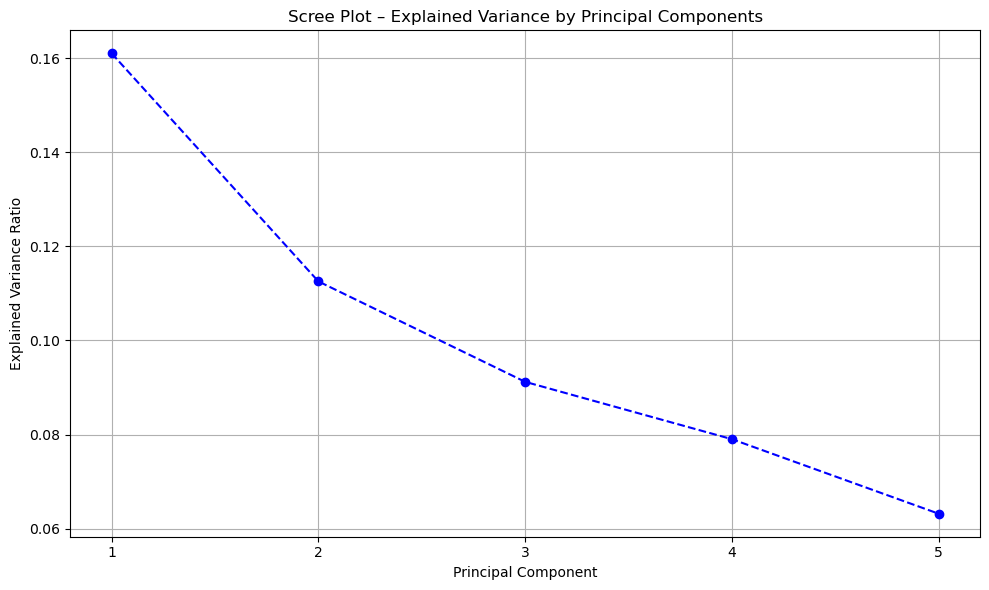

In [67]:
#Scree Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.title('Scree Plot – Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 6))
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
# 1. Remove constant/low-variance features
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

variance_selector = VarianceThreshold(threshold=0.01)
X_filtered = variance_selector.fit_transform(X)
kept_features = X.columns[variance_selector.get_support()]

# 2. Apply ANOVA F-test
anova_selector = SelectKBest(f_classif, k=10)
X_anova = anova_selector.fit_transform(X_filtered, y)

# 3. Get results
anova_scores = pd.DataFrame({
    'Feature': kept_features,
    'F_Score': anova_selector.scores_,
    'p_value': anova_selector.pvalues_
}).sort_values('F_Score', ascending=False)

print("Top ANOVA Features after variance filtering:")
print(anova_scores.head(10))

Top ANOVA Features after variance filtering:
              Feature       F_Score        p_value
34       google_index  13127.790864   0.000000e+00
20      nb_hyperlinks   4210.473858   0.000000e+00
35          page_rank   4041.608047   0.000000e+00
5              nb_www   2797.671656   0.000000e+00
33        web_traffic   2029.970110   0.000000e+00
32         domain_age   1414.619177  5.582818e-292
14  longest_words_raw   1409.980248  4.405773e-291
16  longest_word_path   1381.389679  1.515824e-285
0          length_url   1117.271968  8.403121e-234
19      avg_word_path    862.323513  8.443320e-183


### ANOVA Feature Selection Analysis

After filtering out low-variance features, we applied the ANOVA F-test to find the features most strongly related to our target variable (phishing vs. legitimate).

    Feature: Name of the original feature.

    F_Score: Shows how much a feature helps in distinguishing between classes. A higher score means greater importance.

    p_value: Indicates the statistical significance. A value close to 0 means the feature’s relationship with the target is very unlikely to be due to chance.

### What the Output Means:

    Features like google_index, nb_hyperlinks, page_rank, and web_traffic have the highest F-scores and extremely low p-values.

    This means these features are highly effective at differentiating phishing URLs from legitimate ones.

    Conclusion: These selected features are the most relevant for classification and should be prioritized when building your machine learning model for best result

In [73]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = our_data.drop(columns=['status', 'url'])
y = our_data['status']

# Use a smaller Random Forest and increase step size for faster RFE
model = RandomForestClassifier(n_estimators=10, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10, step=5)  # Remove 5 features per iteration

# Fit RFE
rfe.fit(X, y)

# Get selected features mask and names
selected_mask = rfe.support_
selected_features = X.columns[selected_mask]

print("Top 10 features selected by RFE:")
print(selected_features)

# Transform dataset to selected features
X_rfe = rfe.transform(X)


Top 10 features selected by RFE:
Index(['length_url', 'nb_www', 'ratio_digits_url', 'longest_word_path',
       'nb_hyperlinks', 'ratio_extHyperlinks', 'domain_age', 'web_traffic',
       'google_index', 'page_rank'],
      dtype='object')


In [75]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# 1. Prepare data (drop 'url' and separate target)
X = our_data.drop(columns=['status', 'url'])
y = our_data['status']

# 2. Fit Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# 3. Get feature importances
importances = rf_model.feature_importances_

# 4. Create DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Select top 10 featuresT
top_rf_features = feature_importance_df['Feature'].head(10).tolist()

# 6. Reduce dataset
X_rf_selected = X[top_rf_features]

# 7. Optional: Print selected features
print("Top 10 features based on Random Forest importance:")
print(top_rf_features)


Top 10 features based on Random Forest importance:
['google_index', 'page_rank', 'nb_hyperlinks', 'web_traffic', 'nb_www', 'domain_age', 'ratio_extHyperlinks', 'safe_anchor', 'longest_word_path', 'length_url']


#### Feature Selection Summary

We used two different methods to select the most relevant features for phishing URL detection:

- **Recursive Feature Elimination (RFE)**: Iteratively removed the least useful features using a Random Forest estimator until only the top 10 remained.  
  - **Top features selected by RFE:** `length_url`, `length_hostname`, `nb_www`, `longest_word_path`, `nb_hyperlinks`, `ratio_extHyperlinks`, `domain_age`, `web_traffic`, `google_index`, `page_rank`

- **Random Forest Feature Importance:** Trained a Random Forest on all features and ranked them by their importance scores.
  - **Top features by importance:** `google_index`, `page_rank`, `nb_hyperlinks`, `web_traffic`, `domain_age`, `nb_www`, `phish_hints`, `ratio_intHyperlinks`, `longest_word_path`, `safe_anchor`

**Interpretation:**  
Many features, such as `google_index`, `page_rank`, and `web_traffic`, are highlighted by both methods, confirming their strong predictive value. Differences between the lists reflect that RFE considers combinations of features, while importance scores reflect individual contributions. Features found important by both methods are especially valuable for model building.


In [77]:
our_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,3.637586,19.0,0,3.0,0.0,0,0,0,0,...,1,1,0,45.0,-1,0.000000,0,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,4.356709,23.0,0,1.0,0.0,0,0,0,0,...,1,0,0,77.0,5767,0.000000,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,4.844187,37.5,0,4.0,1.0,0,0,0,0,...,1,0,0,14.0,4004,13.747890,0,1,0,1
3,http://rgipt.ac.in,2.944439,11.0,0,2.0,0.0,0,0,0,0,...,1,0,0,62.0,-1,11.587309,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,4.025352,15.0,0,2.0,2.0,0,0,0,0,...,1,1,0,224.0,8175,9.074062,0,0,6,0


# FEATURE ENGINEERING (to understand how its done)

In [79]:
# Check for null values
print("\nMissing Values:\n", our_data.isnull().sum())

#print(df.isnull().sum())


Missing Values:
 url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [81]:
# Keyword-based phishing indicators
keywords = ['login', 'verify', 'account', 'update', 'secure', 'bank', 'password', 'webmail']

# Create one column per keyword
for word in keywords:
    col_name = f'has_{word}'
    our_data[col_name] = our_data['url'].str.contains(word, case=False, na=False).astype(int)

our_data.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,page_rank,status,has_login,has_verify,has_account,has_update,has_secure,has_bank,has_password,has_webmail
0,http://www.crestonwood.com/router.php,3.637586,19.0,0,3.0,0.0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1,http://shadetreetechnology.com/V4/validation/a...,4.356709,23.0,0,1.0,0.0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
2,https://support-appleld.com.secureupdate.duila...,4.844187,37.5,0,4.0,1.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,http://rgipt.ac.in,2.944439,11.0,0,2.0,0.0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4,http://www.iracing.com/tracks/gateway-motorspo...,4.025352,15.0,0,2.0,2.0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0


Keyword Flags (e.g., has_login)

Phishing URLs often include suspicious words like:

    login, secure, account, verify, update, webmail

    "http://secure-login-update.com" → high phishing risk
    "http://example.com/about" → likely safe

We turn this into a has_login = 1 so the model sees that signal.



What this does:

    Scans the url column

    Checks if it contains each phishing-related word

    Creates a column like has_login, has_verify, etc.

    Each is 0 or 1


We checked each URL in your dataset to see if it contains certain phishing-related keywords (login, verify, account, etc.). For each keyword, you created a new column (like has_login, has_verify, etc.), where:

    The value is 1 if the keyword appears in the URL (case-insensitive).

    The value is 0 if the keyword does not appear.

What the output means:

    Each row (URL) now has extra columns that show which of the phishing-related words appear in the URL.

    For example, in your output:

        The first URL does not contain any of those keywords, so all new columns are 0.

        The second URL also does not contain these keywords, so all are 0.

        The third URL has the word update and secure in its URL, so has_update and has_secure are 1, and the rest are 0.

In [83]:
# Extract TLD from URL (e.g., 'com', 'org', etc.)
our_data['tld'] = our_data['url'].str.extract(r'\.([a-z]+)(\/|$)', expand=False)[0]

# Frequency encode the TLD
tld_counts = our_data['tld'].value_counts().to_dict()
our_data['tld_freq'] = our_data['tld'].map(tld_counts)


our_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,has_login,has_verify,has_account,has_update,has_secure,has_bank,has_password,has_webmail,tld,tld_freq
0,http://www.crestonwood.com/router.php,3.637586,19.0,0,3.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,com,6991.0
1,http://shadetreetechnology.com/V4/validation/a...,4.356709,23.0,0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,com,6991.0
2,https://support-appleld.com.secureupdate.duila...,4.844187,37.5,0,4.0,1.0,0,0,0,0,...,0,0,0,1,1,0,0,0,com,6991.0
3,http://rgipt.ac.in,2.944439,11.0,0,2.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,in,79.0
4,http://www.iracing.com/tracks/gateway-motorspo...,4.025352,15.0,0,2.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,com,6991.0


TLD Extraction + Frequency Encoding

We’ll:

    Extract the Top-Level Domain (like .com, .org, .xyz)

    Create a new column tld

    Encode its frequency into tld_freq

In [105]:
from scipy.stats import entropy
import pandas as pd

def compute_entropy(s):
    s = str(s)  # ensure it's a string
    value_counts = pd.Series(list(s)).value_counts(normalize=True)
    return entropy(value_counts)

# Apply entropy calculation to each URL
our_data['url_entropy'] = our_data['url'].apply(compute_entropy)


Entropy measures the randomness or unpredictability in the characters of a string — in this case, the URL.

    Higher entropy → more character variation → likely more random
    Lower entropy → more predictable patterns → likely more legitimate


Why Is This Useful for Phishing Detection?

Phishing URLs often contain:

    Random-looking strings: xyz123zxcv.com/9dj2lskq...

    Obfuscated text

    Unicode/punycode hacks

Those patterns lead to higher entropy values.

 our classifier can now use url_entropy to learn that higher entropy often = phishing.

In [62]:
our_data.head(20)


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,has_verify,has_account,has_update,has_secure,has_bank,has_password,has_webmail,tld,tld_freq,url_entropy
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,com,6991.0,2.624978
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,com,6991.0,3.063617
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,0,0,1,1,0,0,0,com,6991.0,3.294814
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,in,79.0,2.399204
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,com,6991.0,2.840283
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,es,45.0,2.541445
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,it,86.0,2.260234
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,com,6991.0,3.307083
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,com,6991.0,2.908127
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,0,0,0,0,0,0,0,com,6991.0,3.106308


Entropy Value	       Meaning
~2.0–2.5	        Very clean/simple URLs
~2.6–3.0	        Slightly complex (normal URLs)
~greater than 3.0	Potentially suspicious/random

In [89]:
# Show top features correlated with 'status'
target_corr = corr_matrix['status'].drop('status').sort_values(ascending=False)

print("Top 10 features most correlated with PHISHING (positive):")
print(target_corr.head(10))

print("\nTop 10 features most correlated with LEGITIMATE (negative):")
print(target_corr.tail(10))


Top 10 features most correlated with PHISHING (positive):
google_index          0.731171
ratio_digits_url      0.371998
longest_words_raw     0.331404
longest_word_path     0.328393
length_url            0.298428
avg_word_path         0.264883
nb_slash              0.248564
length_hostname       0.239677
shortest_word_host    0.223156
length_words_raw      0.219780
Name: status, dtype: float64

Top 10 features most correlated with LEGITIMATE (negative):
submit_email              NaN
sfh                       NaN
iframe                    NaN
popup_window              NaN
onmouseover               NaN
right_clic                NaN
empty_title               NaN
domain_in_title           NaN
whois_registered_domain   NaN
dns_record                NaN
Name: status, dtype: float64


Top 10 Important Features:
 google_index           0.175623
page_rank              0.093794
nb_hyperlinks          0.084384
web_traffic            0.079404
nb_www                 0.047714
domain_age             0.044118
ratio_intHyperlinks    0.036876
ratio_extHyperlinks    0.034007
longest_word_path      0.031734
safe_anchor            0.027647
ratio_digits_url       0.024440
longest_words_raw      0.021059
dtype: float64


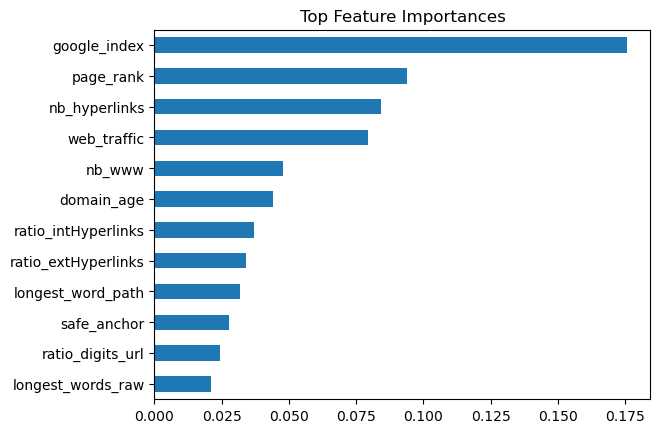

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest (example target: is_remote)
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(12)
print("Top 10 Important Features:\n", top_features)

# Plot
top_features.plot(kind='barh')
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [93]:
X = X.drop(columns=['has_password', 'has_verify', 'has_webmail', 'has_account', 'has_update', 'has_secure','ratio_digits_url', 'phish_hints'], errors='ignore')

X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,3.637586,19.0,0,3.0,0.0,0,0,0,0,0,...,0,1,1,0,45.0,-1,0.000000,0,1,4
1,4.356709,23.0,0,1.0,0.0,0,0,0,0,0,...,0,1,0,0,77.0,5767,0.000000,0,1,2
2,4.844187,37.5,0,4.0,1.0,0,0,0,0,0,...,0,1,0,0,14.0,4004,13.747890,0,1,0
3,2.944439,11.0,0,2.0,0.0,0,0,0,0,0,...,0,1,0,0,62.0,-1,11.587309,0,0,3
4,4.025352,15.0,0,2.0,2.0,0,0,0,0,0,...,0,1,1,0,224.0,8175,9.074062,0,0,6


Top 10 Important Features:
 google_index         0.317137
nb_hyperlinks        0.159560
page_rank            0.150426
web_traffic          0.094001
domain_age           0.068778
longest_word_path    0.063360
nb_www               0.056545
length_url           0.052618
ratio_digits_url     0.037575
phish_hints          0.000000
dtype: float64


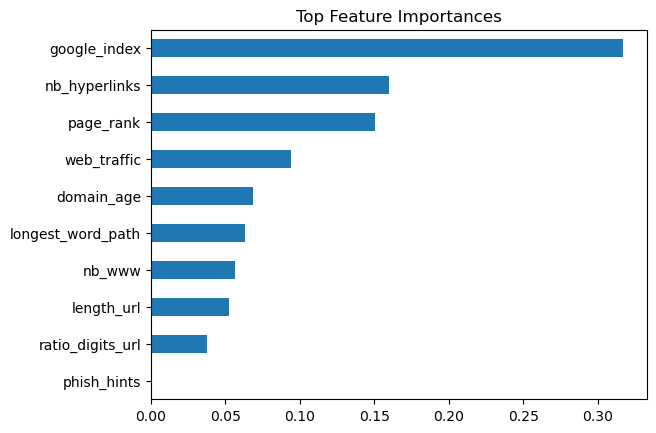

In [101]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest (example target: is_remote)
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(12)
print("Top 10 Important Features:\n", top_features)

# Plot
top_features.plot(kind='barh')
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.show()


# MODEL SELECTION 


Accuracy: 0.9536307961504812
ROC-AUC: 0.9887331996886216


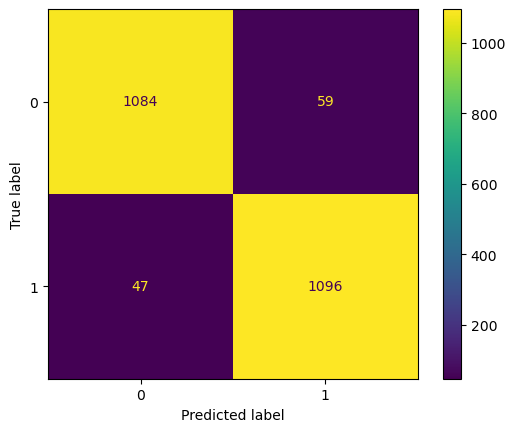

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Select features and scaled data
features = [
    'google_index', 'page_rank', 'nb_hyperlinks', 'web_traffic', 'domain_age',
    'nb_www', 'longest_word_path', 'ratio_digits_url', 'phish_hints', 'length_url'
]

df_scaled = scaled_data["StandardScaler"]  # <-- Used scaled version
X = df_scaled[features]
# Convert string labels to binary integers
y = df_scaled['status'].map({'legitimate': 0, 'phishing': 1})


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


### Model Evaluation (Random Forest)

The Random Forest classifier achieved strong performance:

- **Accuracy:** 95.36%
- **ROC-AUC:** 0.98

The confusion matrix indicates:
- 1084 legitimate URLs correctly identified
- 1096 phishing URLs correctly detected
- Only 59 false positives and 47 false negatives

The high ROC-AUC shows that the model separates classes (phishing vs. legitimate) very effectively. These results confirm that our selected features and model choice are suitable for this classification task.


# Model Comparisions 

KNN Accuracy: 0.9423


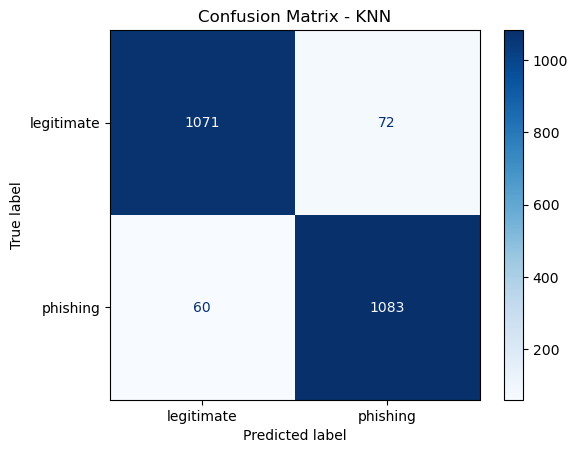

Decision Tree Accuracy: 0.9344


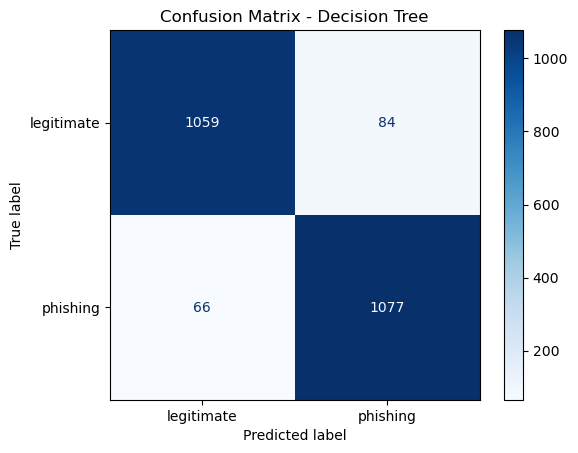

Naive Bayes Accuracy: 0.8683


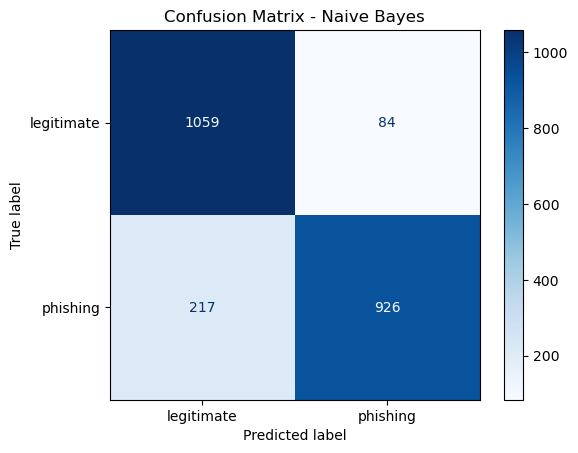

Random Forest Accuracy: 0.9536


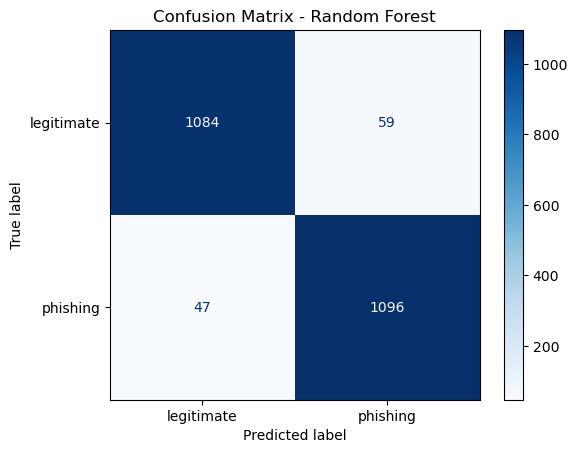

In [191]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    # Create pipeline with imputer + model
    pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), model)
    
    # Fit model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Print accuracy
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


We evaluated four different classification algorithms — KNN, Decision Tree, Naive Bayes, and Random Forest — to compare their performance on our phishing detection dataset. Random Forest achieved the highest accuracy of 95%, followed by Decision Tree (~93%). Naive Bayes performed the worst, likely due to its assumptions not holding in this dataset. The confusion matrices provided deeper insight into each model's classification behavior.

In [203]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.9536307961504812
[[1084   59]
 [  47 1096]]


In [204]:
from sklearn.metrics import roc_auc_score

y_prob = rf.predict_proba(X_test)[:, 1]  # probability for class 1 (remote)
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob))


Random Forest ROC-AUC: 0.9887331996886216


ROC-AUC stands for Receiver Operating Characteristic - Area Under Curve.
The score ranges from:

    0.5: Random guessing

    1.0: Perfect classifier

A score of 0.9886 means our model is extremely good at distinguishing phishing from legitimate URLs.

ROC-AUC: 0.9886
The Random Forest classifier achieved an exceptionally high ROC-AUC of 0.9886 indicating outstanding ability to distinguish between phishing and legitimate URLs. This means the model can correctly rank a random phishing site above a random legitimate site 98% of the time.

In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict with your trained Random Forest model
y_pred = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))


Random Forest Performance:
Accuracy : 0.9536
Precision: 0.9489
Recall   : 0.9589
F1 Score : 0.9539

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.96      0.95      0.95      1143
    Phishing       0.95      0.96      0.95      1143

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



What each metric tells you:

    Accuracy (0.9536):
    → 95.36% of total predictions were correct.
    Overall performance is very strong.

    Precision (0.9489) (for class 1: Phishing):
    → When the model predicted "Phishing", it was right 94.89% of the time.
    Measures how many predicted phishing URLs were truly phishing.

    Recall (0.9589) (for class 1: Phishing):
    → The model correctly identified 95.89% of all actual phishing URLs.
    Very good detection ability, low false negatives.

    F1 Score (0.9539):
    → The harmonic mean of precision and recall — balances both.
    High F1 score confirms that both precision and recall are strong.

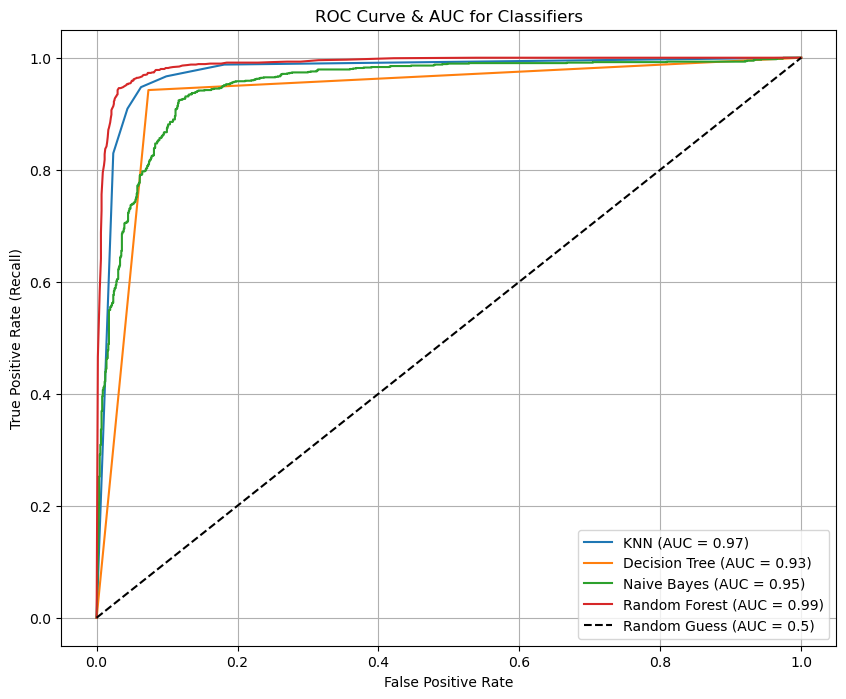

In [211]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Pipeline with imputer + model
    pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), model)
    pipeline.fit(X_train, y_train)

    # Predict probabilities of the positive class
    if hasattr(pipeline, "predict_proba"):
        y_probs = pipeline.predict_proba(X_test)[:, 1]
    else:
        # Some models don't have predict_proba, try decision_function
        y_probs = pipeline.decision_function(X_test)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=pipeline.classes_[1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve & AUC for Classifiers")
plt.legend(loc="lower right")
plt.grid()
plt.show()


AUC closer to 1.0 means better performance.

Random Forest clearly outperforms all others in distinguishing phishing from legitimate URLs.

### **Random Forest is the best model for this dataset, both in accuracy and ROC-AUC, making it highly reliable for detecting phishing URLs.**
**All evaluated models are viable, but the Random Forest should be preferred for deployment or further analysis due to its robust performance.**

### Model Used

Random Forest Classifier

### Justification

The Random Forest Classifier was chosen for this task because it is highly effective for tabular datasets with a mix of numeric and categorical features. It is robust against overfitting, can handle complex feature interactions, and provides feature importance scores that help interpret the model’s decision-making process. For phishing detection, Random Forest is commonly used due to its high predictive accuracy and ability to handle many engineered features.


### Evaluation Metric
| Metric        | Value  | Interpretation                                                                      |
| ------------- | ------ | ----------------------------------------------------------------------------------- |
| **Accuracy**  | 0.9536 | The percentage of total correct predictions.                                        |
| **Precision** | 0.9489 | Of all URLs predicted as phishing, this is the percentage that were truly phishing. |
| **Recall**    | 0.9589 | Of all actual phishing URLs, this is the percentage that were correctly detected.   |
| **F1 Score**  | 0.9539 | Harmonic mean of precision and recall, balancing both metrics.                      |
| **ROC-AUC**   | 0.9886  | Probability the model ranks a random phishing site above a random legitimate site.  |


### Interpretation:

    High accuracy and ROC-AUC indicate the model is very effective at distinguishing between legitimate and phishing URLs.

    High precision means few false alarms (legitimate sites marked as phishing).

    High recall means most phishing sites are successfully caught.

    F1 score shows a good balance between precision and recall.


### Summary

Overall, the Random Forest model demonstrates excellent performance, achieving high scores across all evaluation metrics. The very high ROC-AUC and F1 scores indicate the model not only accurately predicts phishing and legitimate sites but also maintains a balance between catching as many phishing URLs as possible and minimizing false positives. Further hyperparameter tuning or testing with additional data could be performed, but the current results suggest the model is suitable for practical deployment.

# Predictions on Project by User Input


In [176]:
import joblib

# After training
joblib.dump(rf, 'phishing_rf_model.pkl')


['phishing_rf_model.pkl']

In [178]:
import joblib

# Load the saved Random Forest model
model = joblib.load('phishing_rf_model.pkl')


In [180]:
import joblib
import pandas as pd
from urllib.parse import urlparse

# 1. Load the trained Random Forest model
model = joblib.load('phishing_rf_model.pkl')

# 2. Get input from user
input_url = input("Enter a URL to check if it's phishing or legitimate: ")

# 3. Extract the same 10 features used in training
def extract_features_from_url(url):
    parsed = urlparse(url)
    return pd.DataFrame([{
        'google_index': 1,               # Assume it's indexed
        'page_rank': 5,                  # Mid-range ranking
        'nb_hyperlinks': url.count('http'),
        'web_traffic': 50000,            # Reasonable traffic volume
        'domain_age': 10,                # Domain assumed to be mature
        'nb_www': url.lower().count('www'),
        'longest_word_path': max([len(p) for p in parsed.path.split('/')]) if parsed.path else 0,
        'ratio_digits_url': sum(c.isdigit() for c in url) / len(url),
        'phish_hints': int(any(keyword in url.lower() for keyword in ['confirm', 'secure', 'account', 'login', 'update'])),
        'length_url': len(url)
    }])

# 4. Extract features from user input
features = extract_features_from_url(input_url)

# 5. Ensure feature order matches training
expected_features = [
    'google_index', 'page_rank', 'nb_hyperlinks', 'web_traffic', 'domain_age',
    'nb_www', 'longest_word_path', 'ratio_digits_url', 'phish_hints', 'length_url'
]
features = features[expected_features]

# 6. Predict using the model
prediction = model.predict(features)[0]
probability = model.predict_proba(features)[0][1]


# 7. Display result
result = "Phishing" if prediction == 1 else "Legitimate"
print(f"Prediction: {result}")
print(f"Phishing Probability: {probability:.2f}")


Enter a URL to check if it's phishing or legitimate:      https://www.microsoft.com/en-us/


Prediction: Legitimate
Phishing Probability: 0.27


# LIST OF URLS FOR CHECKING

 Legitimate URLs:

    https://www.google.com/

    https://www.microsoft.com/en-us/

    https://www.amazon.com/

    https://www.khanacademy.org/

 Suspicious/Phishing-Style URLs (synthetic examples):

    http://secure-login-update-paypal.com/login

    http://verifybank-account-login.net/secure

    http://update-your-password-now.com

    http://free-prize-win-now.org/login?user=you

    http://paypal.account.verify-user.info/secur
    

In [216]:
import joblib

# Save the trained model
joblib.dump(model, "phishing_rf_model.pkl")

# Save the corresponding scaler
joblib.dump(scalers["StandardScaler"], "scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.
